# Preparing an AF state in the Ising model

This purpose of this notebook is to illustrate how to build a sequence for preparing an AF state in the Ising model. This notebook is supposed to evolve with code updates. 

In [1]:
import numpy as np

from waveforms import ConstantWaveform, RampWaveform
from devices import Chadoq2
from sequences import Sequence
from pulses import Pulse

## Initializing my device

In [2]:
line_qubits ={'q'+ str(j): (0., 5*j) for j in range(6)}
# Do we need a way to create standard lattices, just like in cirq ?

In [3]:
my_device = Chadoq2(line_qubits) 
print(my_device.qubits)
print(my_device.name)

{'q0': (0.0, 0), 'q1': (0.0, 5), 'q2': (0.0, 10), 'q3': (0.0, 15), 'q4': (0.0, 20), 'q5': (0.0, 25)}
Chadoq2


## Defining my waveforms 

We are realizing the following program![AF_Ising_program.png](files/AF_Ising_program.png)

In [4]:
# Parameters in MHz and ns
delta_0 = -8 
delta_f = 4  
Omega_max = 1.2 
t_rise = 250
t_fall = 250
t_sweep = (delta_f-delta_0)/(2*np.pi*10) * 1000
pulses= [] 

In [5]:
rabi_waveform = RampWaveform(t_rise, 0., Omega_max)
pulses.append(Pulse.ConstantDetuning(rabi_waveform, delta_0, 0.))
print(Pulse.ConstantDetuning(rabi_waveform, delta_0, 0.))

Pulse(Amp=[0.0->1.2]MHz, Detuning=-8.0MHz, Phase=0.0)


In [6]:
detuning_waveform = RampWaveform(t_sweep, delta_0, delta_f)
pulses.append(Pulse.ConstantAmplitude(Omega_max, detuning_waveform, 0.))

/Users/loichenriet/Pasqal_code/pasqal-qutip/utils.py:21: UserWarning: The given duration is below the machine's precision of 1 ns time steps. It was rounded down to the nearest integer.
  warnings.warn("The given duration is below the machine's precision"


In [7]:
rabi_waveform = RampWaveform(t_fall, Omega_max, 0.)
pulses.append(Pulse.ConstantDetuning(rabi_waveform, delta_f, 0.))

## Creating my sequence

In [8]:
af_sequence = Sequence(my_device)

In [9]:
af_sequence.available_channels

{'rydberg_global': Rydberg(global, Max Absolute Detuning: 50 MHz, Max Amplitude: 1.25 MHz),
 'rydberg_local': Rydberg(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns),
 'rydberg_local2': Rydberg(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns),
 'raman_local': Raman(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns)}

In [10]:
## Are we sure about the values here ?

In [11]:
af_sequence.declare_channel('Ising_channel', 'rydberg_global')

In [12]:
for pulse in pulses:
    print(pulse)
    af_sequence.add(pulse, 'Ising_channel')

Pulse(Amp=[0.0->1.2]MHz, Detuning=-8.0MHz, Phase=0.0)
Pulse(Amp=1.2MHz, Detuning=[-8.0->4.0]MHz, Phase=0.0)
Pulse(Amp=[1.2->0.0]MHz, Detuning=4.0MHz, Phase=0.0)


Channel: Ising_channel
t: 0 | Initial targets: {'q0', 'q1', 'q5', 'q4', 'q3', 'q2'}
t: 0->250 | Pulse(Amp=[0.0->1.2]MHz, Detuning=-8.0MHz, Phase=0.0) | Targets: {'q0', 'q1', 'q5', 'q4', 'q3', 'q2'}
t: 250->440 | Pulse(Amp=1.2MHz, Detuning=[-8.0->4.0]MHz, Phase=0.0) | Targets: {'q0', 'q1', 'q5', 'q4', 'q3', 'q2'}
t: 440->690 | Pulse(Amp=[1.2->0.0]MHz, Detuning=4.0MHz, Phase=0.0) | Targets: {'q0', 'q1', 'q5', 'q4', 'q3', 'q2'}




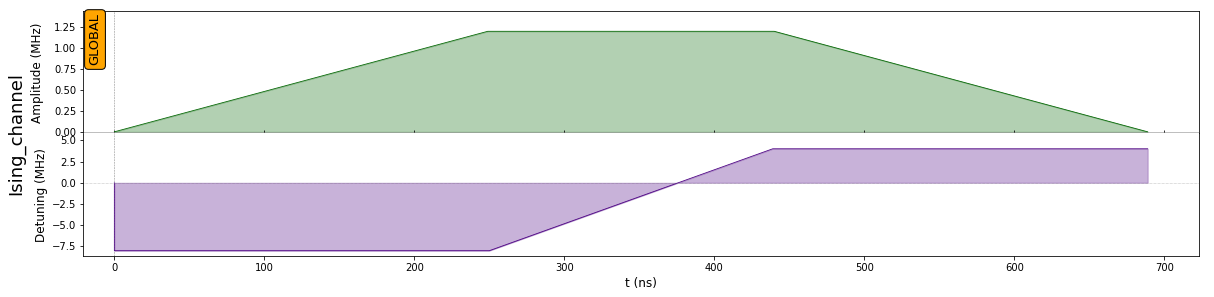

In [13]:
print(af_sequence)
af_sequence.draw()